<a href="https://colab.research.google.com/github/kkimyunjoo/24-2-ESAA/blob/main/1111_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **파이썬 딥러닝 텐서플로 Ch 3. 4, 6~7**

p.87-95, 105-115


## **Part 03. 케라스 (Keras)**


### **04. 모델 세부 설정**

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 코드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print("train set : ", x_train.shape, y_train.shape)
print("test set : ", x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train set :  (60000, 28, 28) (60000,)
test set :  (10000, 28, 28) (10000,)


4-1 초기값 설정
- glorot_normal, glorot_uniform: 글로럿 초기화
- lecun_normal, lecun uniform: Yann Lecun 초기화
- he_normal, he_uniform : He 초기화
- 'random_normal', 'random_uniform': 정규분포, 연속균등 분포 초기화

In [2]:
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [3]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal', activation = 'relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer = he_normal, activation = 'relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


4-2 규제
- 모델의 과대적합을 해소하기 위해 L1, L2 규제 적용

In [4]:
# 기본값
dense = tf.keras.layers.Dense(256, activation = 'relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
# L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer = 'l1', activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha = 0.1 변경
regularizer = tf.keras.regularizers.l1(l1 = 0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer = regularizer, activation = 'relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


4-3 드롭아웃
- 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어
- 노드의 일부 신호를 임의로 삭제 -> 과대적합 방지 가능: 가중치 파라미터의 개수 감소


In [6]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

<Dropout name=dropout, built=False>

4-4 배치 정규화
- 각 층에서 활성화 함수를 통과하기 전 미니 배치 스케일을 정규화
- 별도의 코드 대신 클래스 인스턴스 생성해 추가

In [8]:
# Model A : Dense+Relu
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_a.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model B : Dense+BatchNorm+Relu
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10,activation='softmax')
])

model_b.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

- 손실이 이전 대비 안정적이고, 빠르게 수렴함.
- 데이터 개수가 큰 데이터셋에는 성능에 영향 더 커짐.

4-5 활성화 함수
- 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용할 수 있음.

In [10]:
# Leaky Relu 기본 설정
tf.keras.layers.LeakyReLU()

# Leaky Relu, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


<LeakyReLU name=leaky_re_lu_1, built=False>

In [11]:
# Model C : Dense+BatchNorm_KeakyReLU(0.2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10,activation='softmax')
])

model_c.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,034 (207.16 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 - 3개의 모델을 동일한 조건으로 10번의 epoch동안 훈련한 후 수렴속도 확인하기

In [12]:
model_a.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model A : Dense+ReLU
history_a=model_a.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

# Model B : Dense+BatchNorm+ReLU
history_b=model_b.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

# Model C : Dense+BatchNorm+LeakyReLU(0.2)
history_c=model_c.fit(x_train,y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8438 - loss: 0.5267 - val_accuracy: 0.9533 - val_loss: 0.1589
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9593 - loss: 0.1426 - val_accuracy: 0.9603 - val_loss: 0.1293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9718 - loss: 0.0965 - val_accuracy: 0.9688 - val_loss: 0.1041
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0761 - val_accuracy: 0.9704 - val_loss: 0.0982
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9700 - val_loss: 0.0973
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0494 - val_accuracy: 0.9708 - val_loss: 0.0966
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0417 - val_accuracy: 0.9727 - val_loss: 0.0933
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9887 - loss: 0.0347 - 

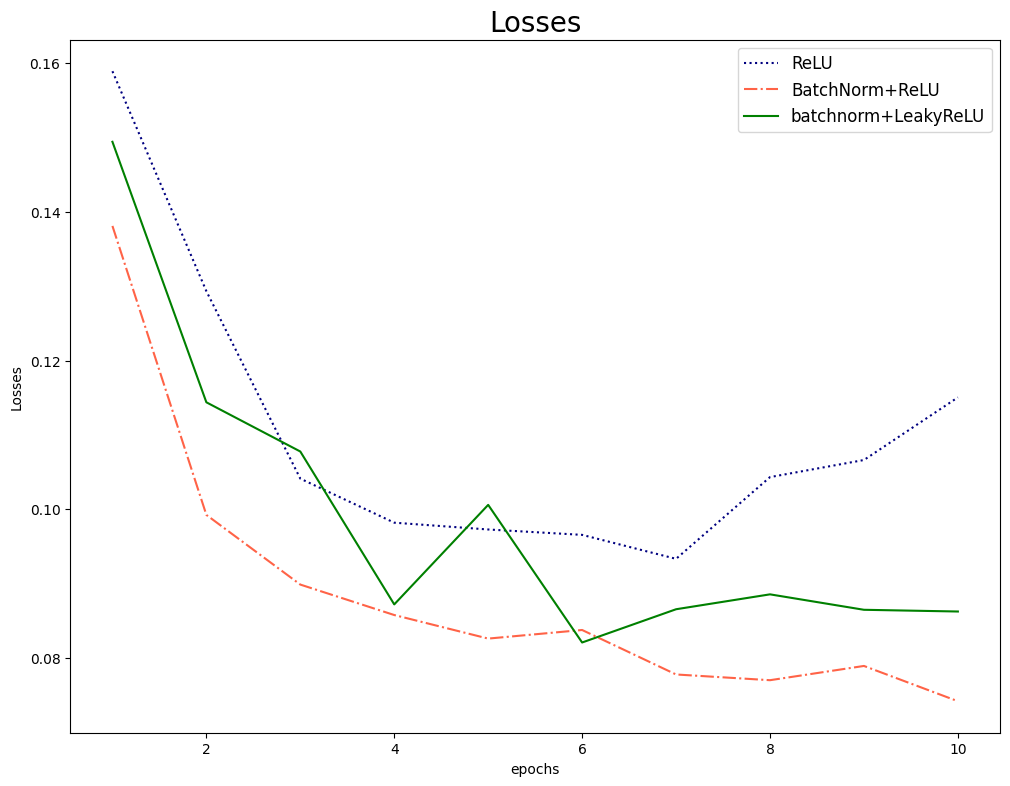

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11),history_a.history['val_loss'],color='navy',linestyle=':')
plt.plot(np.arange(1,11),history_b.history['val_loss'],color='tomato',linestyle='-.')
plt.plot(np.arange(1,11),history_c.history['val_loss'],color='green',linestyle='-')

plt.title('Losses',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm+ReLU','batchnorm+LeakyReLU'],fontsize=12)

### **06. 모델 저장 및 불러오기**

6-1 모델을 파일로 저장
- save() 메소드 사용
- 모델 저장 형식: 'HDF5' 포맷, 'SavedModel' 포맷
  - HDF5: 대용량의 데이터를 저장하기 위한 파일 형식

In [14]:
# 모델을 h5 포맷으로 저장
model_c.save('h5-model.h5')

6-2 저장된 모델 복원
- tf.keras.models.load_model('포맷') 메소드 사용
- .hd 확장자를 생략하면 SavedModel 포맷으로 저장됨. (복원 방식은 동일)

In [15]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,036 (207.18 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2 (12.00 B)

In [16]:
# 모델 검증
loss,acc=h5_model.evaluate(x_test,y_test,verbose=0)
print(f'h5 model]loss:{loss:.5f},acc:{acc:.5f}')

h5 model]loss:0.08626,acc:0.97550


In [19]:
# 모델을 SavedModel 포맷으로 저장
model_c.save('saved-model.keras')  #오류 수정

In [21]:
# 모델 복원
saved_model=tf.keras.models.load_model('saved-model.keras') # 오류 수정
saved_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,878 (413.59 KB)

 Trainable params: 52,842 (206.41 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 52,844 (206.43 KB)

In [22]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose = 0)
print(f'h5 model]loss:{loss:.5f}, acc:{acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose = 0)
print(f'saved_ model]loss:{loss:.5f}, acc:{acc:.5f}')

h5 model]loss:0.08626, acc:0.97550
saved_ model]loss:0.08626, acc:0.97550


### **07. 복잡한 모델 생성**

7-1 함수형 API(Functional API)
- 함수의 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 return 값을 여러개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조 가능
- Sequential API: Sequential 모델만 구현 가능

In [23]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape = (28, 28), name = 'InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name = 'Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation = 'relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation = 'relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation = 'softmax', name = 'OutputLayer')(x3)

In [24]:
# 모델 생성
func_model = tf.keras.Model(inputs = input_layer, outputs = x4, name = 'FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

- plot_model()에 모델 지정하면 구조도를 출력(케라스의 유틸 패키지)

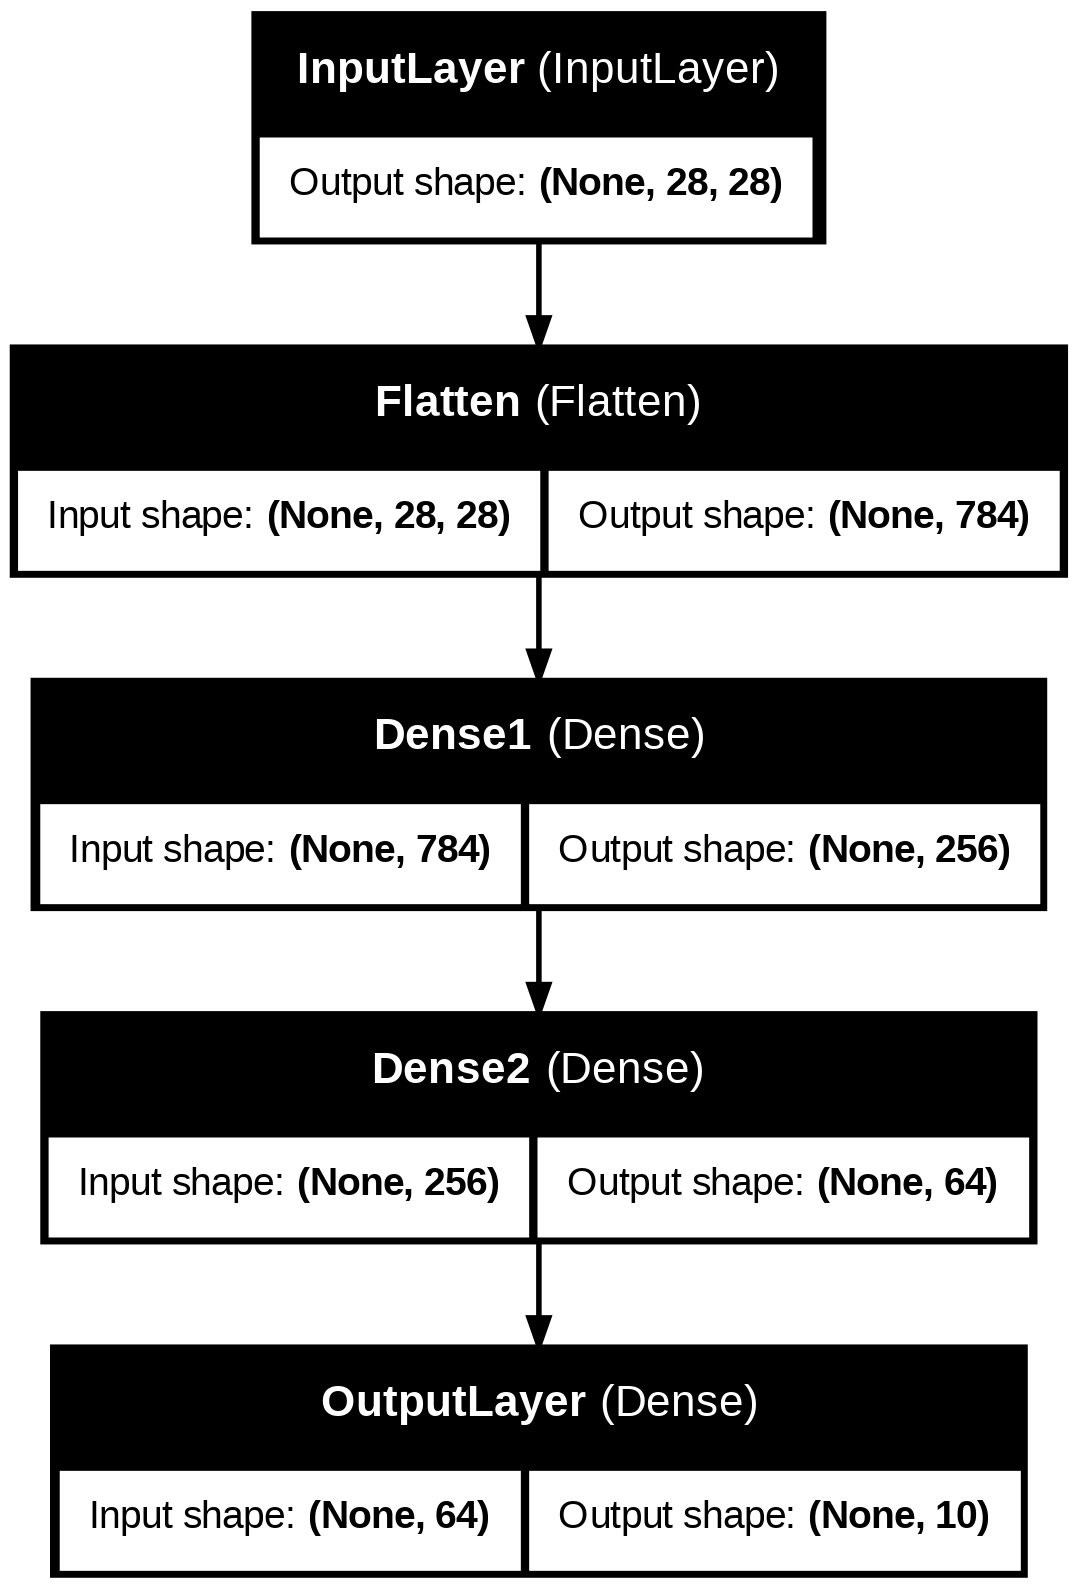

In [25]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [26]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8889 - loss: 0.3754
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9727 - loss: 0.0911
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.0580
Functional Model] loss:0.08141, acc:0.97600


7-2 모델 서브클래싱(Model Subclassing)
- 케라스가 제공하는 모델 클래스를 기반으로 딥 러닝 모델을 구현
- 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있음.
- tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스를 구현
- 모델의 __init__() 함수에 레이어를 정의하고 레이어의 하이퍼파라미터를 정의함.

In [27]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [28]:
# 모델 생성
mymodel=MyModel()

# 모델의 이름 설정
mymodel._name='subclass_model'

# 모델의 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model]loss:{loss:.5f}, acc:{acc:.5f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8912 - loss: 0.3764
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9713 - loss: 0.0904
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9813 - loss: 0.0616
Subclassing Model]loss:0.07282, acc:0.97760


7-3 서브클래싱 모델 파라미터를 활용한 생성
- 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화 하는 예제

In [37]:
class MyModel(tf.keras.Model):

    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [ ]:
# 모델 생성
mymodel = MyModel(256,10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

mymodel.fit(x_train, y_train, epochs=3)

loss,  acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f"Subclassing Model w.parameters] loss : {loss:.5f}.acc : {acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2122 - accuracy: 0.9369
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0869 - accuracy: 0.9732
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0577 - accuracy: 0.9817
Subclassing Model w.parameters]loss:0.07134.acc:0.97750
